In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
matches= pd.read_csv('atp_matches_till_2022.csv')
players= pd.read_csv('atp_players_till_2022.csv')
rankings= pd.read_csv('atp_rankings_till_2022.csv')

In [5]:
matches.columns

Index(['tourney_id', 'tourney_name', 'surface', 'draw_size', 'tourney_level',
       'tourney_date', 'match_num', 'winner_id', 'winner_seed', 'winner_entry',
       'winner_name', 'winner_hand', 'winner_ht', 'winner_ioc', 'winner_age',
       'loser_id', 'loser_seed', 'loser_entry', 'loser_name', 'loser_hand',
       'loser_ht', 'loser_ioc', 'loser_age', 'score', 'best_of', 'round',
       'minutes', 'w_ace', 'w_df', 'w_svpt', 'w_1stIn', 'w_1stWon', 'w_2ndWon',
       'w_SvGms', 'w_bpSaved', 'w_bpFaced', 'l_ace', 'l_df', 'l_svpt',
       'l_1stIn', 'l_1stWon', 'l_2ndWon', 'l_SvGms', 'l_bpSaved', 'l_bpFaced',
       'winner_rank', 'winner_rank_points', 'loser_rank', 'loser_rank_points'],
      dtype='object')

In [6]:
players.head()

,player_id,name_first,name_last,hand,dob,ioc,height,wikidata_id
0,100001,Gardnar,Mulloy,R,19131122.0,USA,185.0,Q54544
1,100002,Pancho,Segura,R,19210620.0,ECU,168.0,Q54581
2,100003,Frank,Sedgman,R,19271002.0,AUS,180.0,Q962049
3,100004,Giuseppe,Merlo,R,19271011.0,ITA,NaN,Q1258752
4,100005,Richard,Gonzalez,R,19280509.0,USA,188.0,Q53554


In [7]:
rankings.head()

,ranking_date,rank,player,points
0,20100104,1,103819,10550.0
1,20100104,2,104745,9205.0
2,20100104,3,104925,8310.0
3,20100104,4,104918,7030.0
4,20100104,5,105223,6785.0


In [8]:
matches_info = matches.info()
players_info = players.info()
rankings_info = rankings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188161 entries, 0 to 188160
Data columns (total 49 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   tourney_id          188161 non-null  object 
 1   tourney_name        188161 non-null  object 
 2   surface             185844 non-null  object 
 3   draw_size           188161 non-null  int64  
 4   tourney_level       188161 non-null  object 
 5   tourney_date        188161 non-null  int64  
 6   match_num           188161 non-null  int64  
 7   winner_id           188161 non-null  int64  
 8   winner_seed         69694 non-null   float64
 9   winner_entry        16270 non-null   object 
 10  winner_name         188161 non-null  object 
 11  winner_hand         188144 non-null  object 
 12  winner_ht           171924 non-null  float64
 13  winner_ioc          188151 non-null  object 
 14  winner_age          186826 non-null  float64
 15  loser_id            188161 non-nul

In [9]:
matches['tourney_date'] = pd.to_datetime(matches['tourney_date'], format='%Y%m%d')
rankings['ranking_date'] = pd.to_datetime(rankings['ranking_date'], format='%Y%m%d')

In [10]:
# Limpiar datos:
# 1. Eliminar filas con más de 40% de valores nulos en matches
threshold = int(0.6 * matches.shape[1])
matches_cleaned = matches.dropna(thresh=threshold)

# 2. Eliminar duplicados
matches_cleaned = matches_cleaned.drop_duplicates()
players_cleaned = players.drop_duplicates()
rankings_cleaned = rankings.drop_duplicates()

# 3. Reiniciar índices
matches_cleaned.reset_index(drop=True, inplace=True)
players_cleaned.reset_index(drop=True, inplace=True)
rankings_cleaned.reset_index(drop=True, inplace=True)

### EDA

#### EDA for matches

##### 1. General information

In [11]:
print("Resumen del dataset:")
print(matches_cleaned.info())
print("\nDescripción estadística:")
print(matches_cleaned.describe(include='all'))

Resumen del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92243 entries, 0 to 92242
Data columns (total 49 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   tourney_id          92243 non-null  object        
 1   tourney_name        92243 non-null  object        
 2   surface             92243 non-null  object        
 3   draw_size           92243 non-null  int64         
 4   tourney_level       92243 non-null  object        
 5   tourney_date        92243 non-null  datetime64[ns]
 6   match_num           92243 non-null  int64         
 7   winner_id           92243 non-null  int64         
 8   winner_seed         40715 non-null  float64       
 9   winner_entry        12260 non-null  object        
 10  winner_name         92243 non-null  object        
 11  winner_hand         92238 non-null  object        
 12  winner_ht           92009 non-null  float64       
 13  winner_ioc          92243

##### 2. Number of games per year

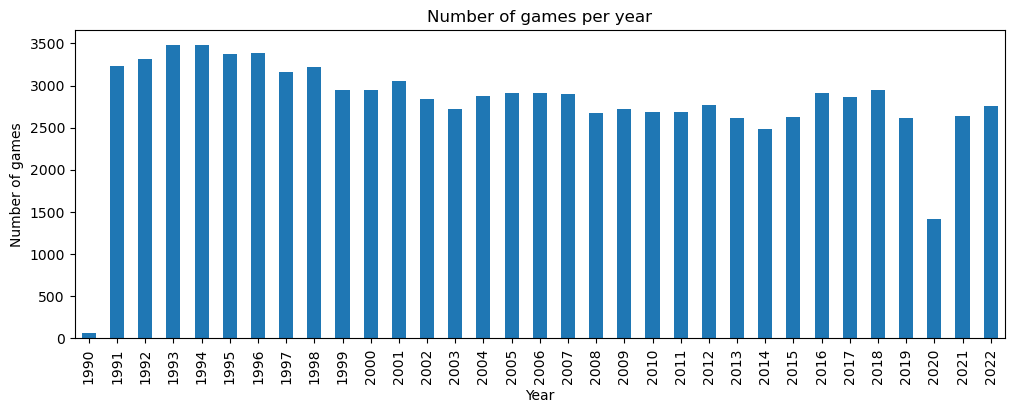

In [12]:
matches_cleaned['year'] = matches_cleaned['tourney_date'].dt.year
matches_per_year = matches_cleaned['year'].value_counts().sort_index()
matches_per_year.plot(kind='bar', figsize=(12, 4), title='Number of games per year')
plt.xlabel('Year')
plt.ylabel('Number of games')
plt.show()

##### 3. Distribution of surfaces

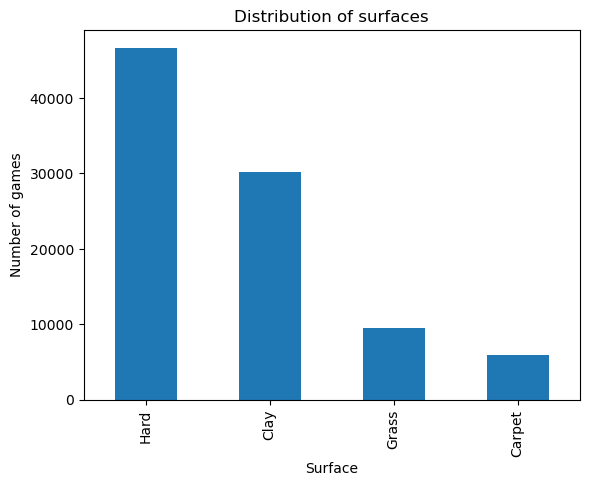

In [13]:
surface_counts = matches_cleaned['surface'].value_counts()
surface_counts.plot(kind='bar', title='Distribution of surfaces')
plt.xlabel('Surface')
plt.ylabel('Number of games')
plt.show()

##### 4. Most Frequent Winners

In [14]:
top_winners = matches_cleaned['winner_id'].value_counts().head(10)
print("\nTop 10 players with most wins:")
print(top_winners)


Top 10 players with most wins:
winner_id
103819    1195
104745    1043
104925    1000
103970     707
104918     689
101736     650
101948     631
104607     607
104053     576
104755     576
Name: count, dtype: int64


In [15]:
players_cleaned[players_cleaned['player_id'] == 103819]

,player_id,name_first,name_last,hand,dob,ioc,height,wikidata_id
3818,103819,Roger,Federer,R,19810808.0,SUI,185.0,Q1426


In [16]:
players_cleaned[players_cleaned['name_last'].str.lower() == 'nadal']


,player_id,name_first,name_last,hand,dob,ioc,height,wikidata_id
4741,104745,Rafael,Nadal,L,19860603.0,ESP,185.0,Q10132
35136,135152,Jorge,Nadal,U,19920811.0,ESP,NaN,NaN


In [17]:
# Count how many times each player_id appears
player_id_counts = players_cleaned['player_id'].value_counts()

# Filter player_ids that appear more than once
duplicate_ids = player_id_counts[player_id_counts > 1].index

# Show sample of these duplicates
duplicate_players = players_cleaned[players_cleaned['player_id'].isin(duplicate_ids)]
print(f"Number of duplicated player_ids: {len(duplicate_ids)}")
duplicate_players.sort_values('player_id').head(20)


Number of duplicated player_ids: 0


,player_id,name_first,name_last,hand,dob,ioc,height,wikidata_id


##### 5. Winner Aces Distribution

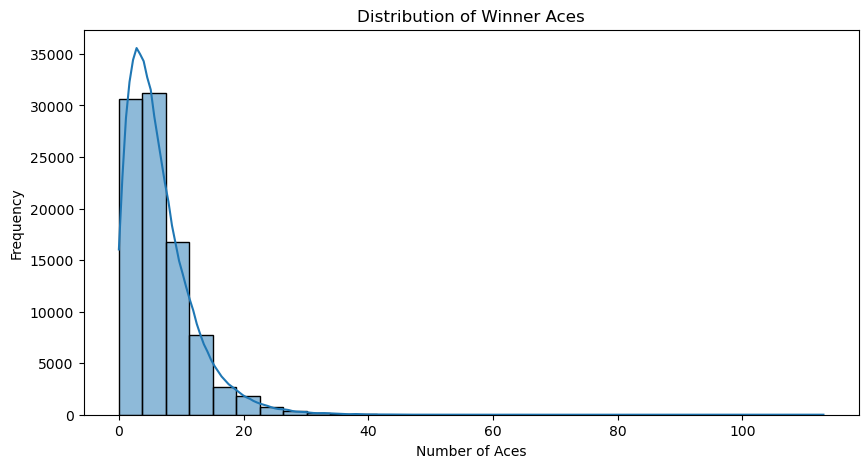

In [18]:
plt.figure(figsize=(10, 5))
sns.histplot(matches_cleaned['w_ace'].dropna(), bins=30, kde=True)
plt.title('Distribution of Winner Aces')
plt.xlabel('Number of Aces')
plt.ylabel('Frequency')
plt.show()

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

In [20]:
# Shape & missingness in key stats
print("Shape:", matches.shape)

# Missingness in key stats
stat_cols = ['w_ace','w_df','w_svpt','w_1stIn','w_1stWon','w_2ndWon',
             'w_SvGms','w_bpSaved','w_bpFaced',
             'l_ace','l_df','l_svpt','l_1stIn','l_1stWon','l_2ndWon',
             'l_SvGms','l_bpSaved','l_bpFaced']
miss = matches[stat_cols].isna().mean().sort_values(ascending=False)
print("\n% missing in each stat:")
print((miss*100).round(1))

Shape: (188161, 49)

% missing in each stat:
l_ace        51.0
w_bpFaced    51.0
l_bpSaved    51.0
l_2ndWon     51.0
l_1stWon     51.0
l_1stIn      51.0
l_svpt       51.0
w_df         51.0
l_bpFaced    51.0
w_bpSaved    51.0
w_2ndWon     51.0
w_1stWon     51.0
w_1stIn      51.0
w_svpt       51.0
l_df         51.0
w_SvGms      51.0
l_SvGms      51.0
w_ace        51.0
dtype: float64


In [21]:
display(matches[stat_cols].describe().T)

,count,mean,std,min,25%,50%,75%,max
w_ace,92220.0,6.517708,5.341289,0.0,3.0,5.0,9.0,113.0
w_df,92219.0,2.736258,2.367377,0.0,1.0,2.0,4.0,26.0
w_svpt,92219.0,78.068142,29.523162,0.0,56.0,73.0,94.0,491.0
w_1stIn,92219.0,47.581724,19.216689,0.0,34.0,44.0,58.0,361.0
w_1stWon,92219.0,35.873746,13.836610,0.0,26.0,33.0,43.0,292.0
w_2ndWon,92219.0,16.733883,6.989782,0.0,12.0,16.0,21.0,82.0
w_SvGms,92220.0,12.396758,4.120292,0.0,9.0,11.0,15.0,90.0
w_bpSaved,92219.0,3.527549,3.086390,0.0,1.0,3.0,5.0,24.0
w_bpFaced,92219.0,5.167406,4.063021,0.0,2.0,4.0,7.0,34.0
l_ace,92219.0,4.828745,4.670710,0.0,2.0,4.0,7.0,103.0


In [22]:
# Compute winner–loser diffs
diffs = {}
for stat in ['ace','df','svpt','1stIn','1stWon','2ndWon','SvGms','bpSaved','bpFaced']:
    diffs[f'{stat}_diff'] = matches[f'w_{stat}'] - matches[f'l_{stat}']

diff_df = pd.DataFrame(diffs)
matches = pd.concat([matches, diff_df], axis=1)

# Quick check
display(matches[list(diffs.keys())].describe().T)

,count,mean,std,min,25%,50%,75%,max
ace_diff,92219.0,1.688979,5.877980,-65.0,-1.0,1.0,5.0,57.0
df_diff,92219.0,-0.751884,3.053940,-24.0,-3.0,-1.0,1.0,22.0
svpt_diff,92219.0,-2.840141,13.555749,-77.0,-11.0,-3.0,6.0,141.0
1stIn_diff,92219.0,-0.429825,11.704071,-66.0,-8.0,0.0,7.0,83.0
1stWon_diff,92219.0,3.978855,7.464773,-41.0,-1.0,4.0,9.0,54.0
2ndWon_diff,92219.0,1.748620,6.019871,-31.0,-2.0,2.0,6.0,34.0
SvGms_diff,92220.0,0.199371,0.724205,-8.0,0.0,0.0,1.0,19.0
bpSaved_diff,92219.0,-1.284453,4.007283,-24.0,-4.0,-1.0,1.0,24.0
bpFaced_diff,92219.0,-3.575478,4.534002,-27.0,-6.0,-4.0,-1.0,25.0


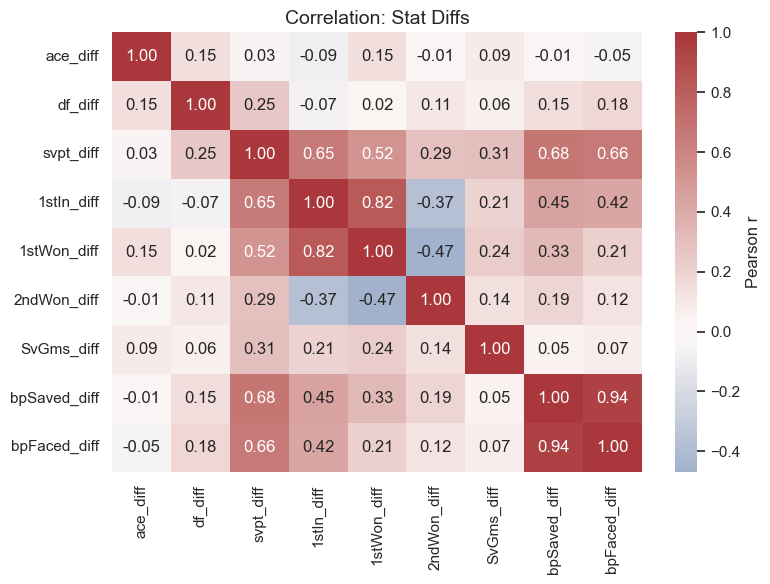

In [23]:
corr = matches[list(diffs.keys())].corr()
plt.figure(figsize=(8,6))
sns.heatmap(
    corr, annot=True, fmt=".2f",
    cmap="vlag", center=0,
    cbar_kws={'label':'Pearson r'}
)
plt.title("Correlation: Stat Diffs", fontsize=14)
plt.tight_layout()
plt.show()

/var/folders/sk/q2q5sl7n5wv54vb1kn1y2bvc0000gn/T/ipykernel_7345/1900088763.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feat_corr.values, y=feat_corr.index, palette="mako")


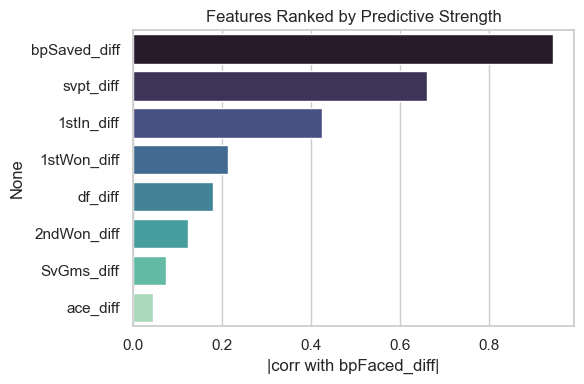

In [24]:
# Use 'bpFaced_diff' as the target for correlation ranking
target = 'bpFaced_diff'
feat_corr = corr[target].drop(target).abs().sort_values(ascending=False)
plt.figure(figsize=(6,4))
sns.barplot(x=feat_corr.values, y=feat_corr.index, palette="mako")
plt.xlabel(f"|corr with {target}|")
plt.title("Features Ranked by Predictive Strength")
plt.tight_layout()
plt.show()

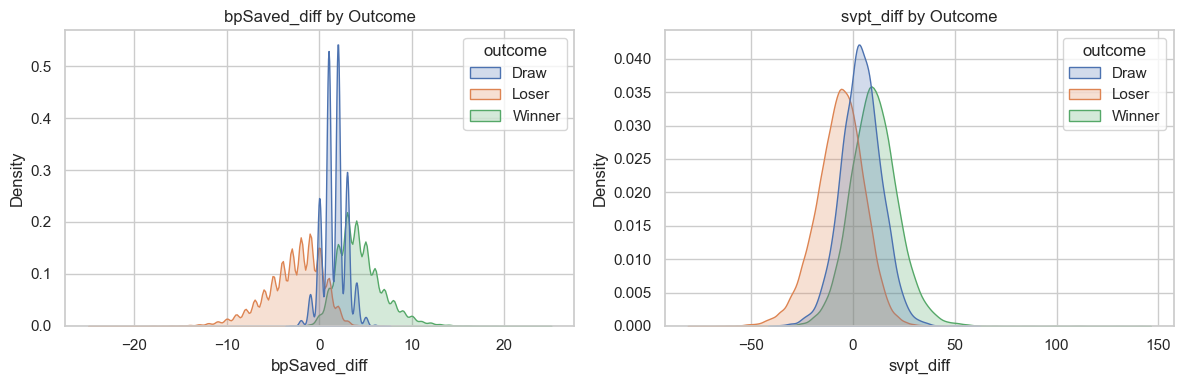

In [25]:
# Create a categorical outcome column based on the sign of the target
matches['outcome'] = matches[target].apply(lambda x: 'Winner' if x > 0 else ('Loser' if x < 0 else 'Draw'))

top2 = feat_corr.index[:2].tolist()

fig, axes = plt.subplots(1, 2, figsize=(12,4))
for ax, col in zip(axes, top2):
    sns.kdeplot(data=matches, x=col, hue='outcome',
                fill=True, common_norm=False, ax=ax)
    ax.set_title(f"{col} by Outcome")
plt.tight_layout(); plt.show()

## MODEL (NACH0)

WE FILTER THE DATA 2005 - 2022

In [26]:
matches['tourney_date'] 
rankings['ranking_date']

0         2010-01-04
1         2010-01-04
2         2010-01-04
3         2010-01-04
4         2010-01-04
             ...    
3113256   2009-12-28
3113257   2009-12-28
3113258   2009-12-28
3113259   2009-12-28
3113260   2009-12-28
Name: ranking_date, Length: 3113261, dtype: datetime64[ns]

In [27]:
rankings = rankings[rankings['ranking_date'] >= '2005-01-01']
matches = matches[matches['tourney_date'] >= '2005-01-01']

In [28]:
rankings['ranking_date'].min()


Timestamp('2005-01-03 00:00:00')

In [60]:
matches['tourney_date'].max()

Timestamp('2022-08-29 00:00:00')

In [30]:
# Obtener IDs únicos de jugadores que jugaron entre 2005 y 2022
jugadores_2005_2022 = pd.unique(matches[['winner_id', 'loser_id']].values.ravel())
# Filtrar solo los jugadores activos en ese periodo
players_filtrados = players[players['player_id'].isin(jugadores_2005_2022)]

print(f"Total en players original: {players.shape[0]}")
print(f"Jugadores activos 2005–2022: {players_filtrados.shape[0]}")


Total en players original: 58687
Jugadores activos 2005–2022: 1965


CHECKING NULL VALUES 

In [31]:
# Diccionario con los dataframes finales
dataframes = {
    'matches': matches,
}

# Calcular y mostrar porcentaje de nulos
for name, df in dataframes.items():
    print(f"\n{name.upper()} — % de nulos por columna:")
    null_pct = (df.isna().mean() * 100).round(2).sort_values(ascending=False)
    display(null_pct[null_pct > 0])



MATCHES — % de nulos por columna:


winner_entry          87.38
loser_entry           79.36
loser_seed            76.70
winner_seed           57.37
minutes               10.92
w_2ndWon               8.25
w_ace                  8.25
w_df                   8.25
l_bpSaved              8.25
w_1stIn                8.25
w_1stWon               8.25
w_svpt                 8.25
l_bpFaced              8.25
w_bpFaced              8.25
l_ace                  8.25
l_df                   8.25
l_svpt                 8.25
l_1stIn                8.25
l_1stWon               8.25
w_bpSaved              8.25
l_2ndWon               8.25
bpFaced_diff           8.25
bpSaved_diff           8.25
2ndWon_diff            8.25
ace_diff               8.25
1stWon_diff            8.25
df_diff                8.25
1stIn_diff             8.25
svpt_diff              8.25
l_SvGms                8.24
w_SvGms                8.24
SvGms_diff             8.24
loser_ht               4.02
winner_ht              1.90
loser_rank_points      1.80
loser_rank          

In [32]:
matches.drop(columns=['winner_entry', 'loser_entry', 'winner_seed', 'loser_seed'], inplace=True)


In [33]:
# Diccionario con los dataframes finales
dataframes = {
    
    'rankings': rankings,
    'players_filtrados': players_filtrados
}

# Calcular y mostrar porcentaje de nulos
for name, df in dataframes.items():
    print(f"\n{name.upper()} — % de nulos por columna:")
    null_pct = (df.isna().mean() * 100).round(2).sort_values(ascending=False)
    display(null_pct[null_pct > 0])



RANKINGS — % de nulos por columna:


points    0.03
dtype: float64


PLAYERS_FILTRADOS — % de nulos por columna:


height         42.19
wikidata_id    19.64
hand            1.27
dob             0.31
dtype: float64

  WE FILTER FOR 4 GRAND SLAMS 

In [34]:
matches = matches[matches['tourney_level'] == 'G']


In [35]:
jugadores_grand_slam = pd.unique(matches[['winner_id', 'loser_id']].values.ravel())
rankings = rankings[rankings['player'].isin(jugadores_grand_slam)]


In [36]:
print(f"Partidos en Grand Slams: {matches.shape[0]}")
print(f"Jugadores únicos en GS: {len(jugadores_grand_slam)}")


Partidos en Grand Slams: 9017
Jugadores únicos en GS: 697


In [37]:
matches

,tourney_id,tourney_name,surface,draw_size,tourney_level,tourney_date,match_num,winner_id,winner_name,winner_hand,...,ace_diff,df_diff,svpt_diff,1stIn_diff,1stWon_diff,2ndWon_diff,SvGms_diff,bpSaved_diff,bpFaced_diff,outcome
137797,2005-520,Roland Garros,Clay,128,G,2005-05-23,1,103819,Roger Federer,R,...,2.0,0.0,-4.0,-2.0,13.0,2.0,1.0,-4.0,-10.0,Loser
137798,2005-520,Roland Garros,Clay,128,G,2005-05-23,2,104597,Nicolas Almagro,R,...,2.0,1.0,-3.0,12.0,9.0,-5.0,-1.0,2.0,-1.0,Loser
137799,2005-520,Roland Garros,Clay,128,G,2005-05-23,3,102494,Tomas Behrend,R,...,9.0,-2.0,-40.0,-18.0,-7.0,-1.0,0.0,-11.0,-15.0,Loser
137800,2005-520,Roland Garros,Clay,128,G,2005-05-23,4,103602,Fernando Gonzalez,R,...,-2.0,-3.0,-12.0,0.0,6.0,0.0,1.0,-6.0,-9.0,Loser
137801,2005-520,Roland Garros,Clay,128,G,2005-05-23,5,104386,Janko Tipsarevic,R,...,0.0,-2.0,-8.0,-30.0,-7.0,10.0,1.0,-4.0,-6.0,Loser
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
187461,2022-560,Us Open,Hard,128,G,2022-08-29,222,207989,Carlos Alcaraz,R,...,-3.0,-6.0,-44.0,-7.0,-6.0,-8.0,2.0,-6.0,-10.0,Loser
187462,2022-560,Us Open,Hard,128,G,2022-08-29,223,126207,Frances Tiafoe,R,...,4.0,2.0,3.0,-4.0,3.0,9.0,0.0,1.0,0.0,Draw
187463,2022-560,Us Open,Hard,128,G,2022-08-29,224,134770,Casper Ruud,R,...,-5.0,-2.0,-16.0,-15.0,0.0,4.0,1.0,-5.0,-8.0,Loser
187464,2022-560,Us Open,Hard,128,G,2022-08-29,225,207989,Carlos Alcaraz,R,...,-9.0,-3.0,-13.0,29.0,24.0,-16.0,1.0,-7.0,-13.0,Loser


## FEATURE ENGINEER 

In [38]:
# --- 1. Asegúrate de que los rankings sean numéricos --------------------------
matches['winner_rank'] = pd.to_numeric(matches['winner_rank'], errors='coerce')
matches['loser_rank']  = pd.to_numeric(matches['loser_rank'],  errors='coerce')

# --- 2. Rellena NaN con un valor "muy malo" para poder comparar ---------------
#  (por ejemplo, algo más alto que cualquier ranking real)
big_rank = max(matches['winner_rank'].max(), matches['loser_rank'].max()) + 100
matches['winner_rank_filled'] = matches['winner_rank'].fillna(big_rank)
matches['loser_rank_filled']  = matches['loser_rank'].fillna(big_rank)

# --- 3. Determina si el ganador estaba MEJOR rankeado (número más bajo) ------
winner_is_better = matches['winner_rank_filled'] <= matches['loser_rank_filled']

# --- 4. Construye las columnas Jugador 1 / Jugador 2 y el target -------------
matches['p1_id']   = np.where(winner_is_better, matches['winner_id'],  matches['loser_id'])
matches['p2_id']   = np.where(winner_is_better, matches['loser_id'],   matches['winner_id'])
matches['p1_rank'] = np.where(winner_is_better, matches['winner_rank'],matches['loser_rank'])
matches['p2_rank'] = np.where(winner_is_better, matches['loser_rank'], matches['winner_rank'])

# Variable objetivo: 1 si el mejor rankeado (Jugador 1) ganó, 0 si perdió (upset)
matches['y'] = np.where(winner_is_better, 1, 0)

# --- 5. (Opcional) Elimina columnas auxiliares si ya no las necesitas --------
matches.drop(columns=['winner_rank_filled', 'loser_rank_filled'], inplace=True)

In [42]:
# 1) El Jugador 1 siempre debe tener ranking ≤ Jugador 2
inverted = (matches['p1_rank'] > matches['p2_rank']).sum()
print(f"Filas donde p1_rank > p2_rank (debería ser 0): {inverted}")

# 2) La etiqueta y debe ser 1 cuando p1 es el ganador real
mismatch = ((matches['y'] == 1) & (matches['winner_id'] != matches['p1_id'])).sum()
print(f"Filas donde y=1 pero winner_id ≠ p1_id (debería ser 0): {mismatch}")

# 3) Distribución de la clase objetivo
print(matches['y'].value_counts(normalize=True).rename('%').round(3))


Filas donde p1_rank > p2_rank (debería ser 0): 0
Filas donde y=1 pero winner_id ≠ p1_id (debería ser 0): 0
y
1    0.724
0    0.276
Name: %, dtype: float64


Diferencia de edad/estatuta/ranking_atp

In [45]:


# ---------------------------------------------------------------------
# 1) Igualamos edad y altura a la convención Jugador 1 / Jugador 2
# ---------------------------------------------------------------------
matches['winner_age'] = pd.to_numeric(matches['winner_age'], errors='coerce')
matches['loser_age']  = pd.to_numeric(matches['loser_age'],  errors='coerce')
matches['winner_ht']  = pd.to_numeric(matches['winner_ht'],  errors='coerce')
matches['loser_ht']   = pd.to_numeric(matches['loser_ht'],   errors='coerce')

matches['p1_age'] = np.where(matches['winner_id'] == matches['p1_id'],
                             matches['winner_age'], matches['loser_age'])
matches['p2_age'] = np.where(matches['winner_id'] == matches['p1_id'],
                             matches['loser_age'],  matches['winner_age'])

matches['p1_ht']  = np.where(matches['winner_id'] == matches['p1_id'],
                             matches['winner_ht'],  matches['loser_ht'])
matches['p2_ht']  = np.where(matches['winner_id'] == matches['p1_id'],
                             matches['loser_ht'],   matches['winner_ht'])

# ---------------------------------------------------------------------
# 2) Igualamos los puntos de ranking ATP (si los tienes)
# ---------------------------------------------------------------------
matches['winner_rank_points'] = pd.to_numeric(matches['winner_rank_points'], errors='coerce')
matches['loser_rank_points']  = pd.to_numeric(matches['loser_rank_points'],  errors='coerce')

matches['p1_rank_pts'] = np.where(matches['winner_id'] == matches['p1_id'],
                                  matches['winner_rank_points'], matches['loser_rank_points'])
matches['p2_rank_pts'] = np.where(matches['winner_id'] == matches['p1_id'],
                                  matches['loser_rank_points'],  matches['winner_rank_points'])

# ---------------------------------------------------------------------
# 3) CALCULO DE FEATURES DIFERENCIALES (sin seed)
# ---------------------------------------------------------------------
matches['rank_diff']     = matches['p1_rank']     - matches['p2_rank']
matches['rank_pts_diff'] = matches['p1_rank_pts'] - matches['p2_rank_pts']
matches['age_diff']      = matches['p1_age']      - matches['p2_age']
matches['height_diff']   = matches['p1_ht']       - matches['p2_ht']

# ---------------------------------------------------------------------
# 4) Imputación sencilla de NaN en edad y altura (opcional)
# ---------------------------------------------------------------------
median_ht  = matches[['p1_ht',  'p2_ht']].stack().median()
median_age = matches[['p1_age', 'p2_age']].stack().median()

matches['p1_ht'].fillna(median_ht,  inplace=True)
matches['p2_ht'].fillna(median_ht,  inplace=True)
matches['p1_age'].fillna(median_age, inplace=True)
matches['p2_age'].fillna(median_age, inplace=True)

# Puntos de ranking faltantes → 0
matches[['p1_rank_pts', 'p2_rank_pts']] = matches[['p1_rank_pts', 'p2_rank_pts']].fillna(0)

# ---------------------------------------------------------------------
# 5) Revisa las nuevas columnas
# ---------------------------------------------------------------------
print(matches[['rank_diff', 'rank_pts_diff', 'age_diff', 'height_diff']].head())



        rank_diff  rank_pts_diff  age_diff  height_diff
137797     -263.0         6462.0       3.6         10.0
137798       -3.0           32.0       1.9         -5.0
137799      -41.0          344.0      -4.0        -23.0
137800      -26.0          460.0      -0.2         -7.0
137801      -87.0          891.0       6.4          3.0


/var/folders/sk/q2q5sl7n5wv54vb1kn1y2bvc0000gn/T/ipykernel_7345/3660167570.py:44: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  matches['p1_ht'].fillna(median_ht,  inplace=True)
/var/folders/sk/q2q5sl7n5wv54vb1kn1y2bvc0000gn/T/ipykernel_7345/3660167570.py:45: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values alw

Mano dominante, Creamos variable binaria

In [48]:
# Convertimos las columnas de mano dominante a string (por si acaso)
matches['winner_hand'] = matches['winner_hand'].astype(str)
matches['loser_hand']  = matches['loser_hand'].astype(str)

# Asignamos handedness a p1 y p2 según quién es quién
matches['p1_hand'] = np.where(matches['winner_id'] == matches['p1_id'],
                              matches['winner_hand'], matches['loser_hand'])
matches['p2_hand'] = np.where(matches['winner_id'] == matches['p1_id'],
                              matches['loser_hand'],  matches['winner_hand'])

# Creamos variable binaria: 1 si una mano es 'R' y la otra 'L' (independientemente del orden)
matches['hand_diff'] = (
    (matches['p1_hand'] != matches['p2_hand']) &
    (matches['p1_hand'].isin(['R', 'L'])) &
    (matches['p2_hand'].isin(['R', 'L']))
).astype(int)




Historial reciente o forma: Es importante reflejar cómo han jugado últimamente los tenistas,
dado que el rendimiento reciente puede cambiar respecto a su ranking histórico .
Construimos una feature de partidos ganados en los últimos X partidos (o en los últimos Y
meses) para cada jugador antes del partido. Por ejemplo, para cada jugador calculamos su
porcentaje de victorias en sus últimos 10 encuentros previos a la fecha del partido, o
simplemente el conteo de victorias en los últimos 5 partidos. Luego la feature podría ser la
diferencia de racha ganadora: win_streak_diff = (victorias últimas10 de Jug1) -
(victorias últimas10 de Jug2) . Esto intenta medir quién llega en mejor forma reciente.
(Otra variante: número de torneos o rondas alcanzadas en el último año, o victorias en la gira previa
al Slam).

In [49]:
# 1. Ordenamos los partidos por fecha
matches = matches.sort_values('tourney_date').reset_index(drop=True)

# 2. Creamos estructura auxiliar para almacenar historial de partidos
from collections import defaultdict, deque

# Cada jugador tendrá un historial con sus últimos resultados
historial_victorias = defaultdict(lambda: deque(maxlen=10))  # últimos 10 partidos por jugador

# Lista para guardar la feature calculada por fila
win_streak_p1 = []
win_streak_p2 = []

# 3. Recorremos cada partido y calculamos la racha previa para cada jugador
for _, row in matches.iterrows():
    p1 = row['p1_id']
    p2 = row['p2_id']
    winner = row['winner_id']

    # Porcentaje de victorias recientes (o número, si prefieres)
    p1_victorias = sum(historial_victorias[p1])
    p2_victorias = sum(historial_victorias[p2])

    win_streak_p1.append(p1_victorias)
    win_streak_p2.append(p2_victorias)

    # Actualizamos el historial del partido actual
    historial_victorias[p1].append(1 if p1 == winner else 0)
    historial_victorias[p2].append(1 if p2 == winner else 0)

# 4. Asignamos la feature al dataframe
matches['p1_win_streak'] = win_streak_p1
matches['p2_win_streak'] = win_streak_p2
matches['win_streak_diff'] = matches['p1_win_streak'] - matches['p2_win_streak']


Tambien tomamos las ultimas victorias por surface 

In [50]:
from collections import defaultdict, deque

# 1. Asegúrate de tener surface limpia
matches['surface'] = matches['surface'].astype(str)

# 2. Estructura: historial separado por jugador y superficie
historial_por_superficie = defaultdict(lambda: {
    'Clay': deque(maxlen=10),
    'Hard': deque(maxlen=10),
    'Grass': deque(maxlen=10)
})

# 3. Inicializamos listas para las nuevas columnas
p1_wins_surface = []
p2_wins_surface = []

# 4. Recorremos partidos cronológicamente
matches = matches.sort_values('tourney_date').reset_index(drop=True)

for _, row in matches.iterrows():
    p1 = row['p1_id']
    p2 = row['p2_id']
    winner = row['winner_id']
    surface = row['surface']

    # Conteo de victorias recientes en esa superficie
    p1_hist = historial_por_superficie[p1][surface]
    p2_hist = historial_por_superficie[p2][surface]

    p1_wins_surface.append(sum(p1_hist))
    p2_wins_surface.append(sum(p2_hist))

    # Actualizamos historial con el resultado del partido actual
    historial_por_superficie[p1][surface].append(1 if p1 == winner else 0)
    historial_por_superficie[p2][surface].append(1 if p2 == winner else 0)

# 5. Añadimos al dataframe
matches['p1_surface_streak'] = p1_wins_surface
matches['p2_surface_streak'] = p2_wins_surface
matches['surface_streak_diff'] = matches['p1_surface_streak'] - matches['p2_surface_streak']


diferencias entres partidos jugados en Grand Slams 

In [51]:
from collections import defaultdict

# 1. Ordenamos por fecha (muy importante para que la experiencia se acumule correctamente)
matches = matches.sort_values('tourney_date').reset_index(drop=True)

# 2. Inicializamos contador de partidos por jugador
partidos_gs = defaultdict(int)

# 3. Creamos listas para guardar la experiencia de cada jugador antes del partido
p1_exp = []
p2_exp = []

# 4. Recorremos todos los partidos en orden cronológico
for _, row in matches.iterrows():
    p1 = row['p1_id']
    p2 = row['p2_id']

    # Guardamos cuántos partidos en GS había jugado cada uno hasta ese momento
    p1_exp.append(partidos_gs[p1])
    p2_exp.append(partidos_gs[p2])

    # Actualizamos sus contadores tras jugar este partido
    partidos_gs[p1] += 1
    partidos_gs[p2] += 1

# 5. Añadimos al dataframe
matches['p1_gs_experience'] = p1_exp
matches['p2_gs_experience'] = p2_exp
matches['gs_matches_diff'] = matches['p1_gs_experience'] - matches['p2_gs_experience']


one-hot-encoding para la superficie 

In [52]:
# Asegúrate de que 'surface' esté en formato string
matches['surface'] = matches['surface'].astype(str)

# One-hot encoding de la superficie (manteniendo solo las 3 principales)
dummies = pd.get_dummies(matches['surface'], prefix='surface')

# Solo nos quedamos con las 3 superficies oficiales de Grand Slam
dummies = dummies[['surface_Clay', 'surface_Grass', 'surface_Hard']]

# Añadimos las columnas al dataframe original
matches = pd.concat([matches, dummies], axis=1)


one-hot-encoding para la fase del torneo 


In [53]:
# Mapa de las rondas oficiales en Grand Slams (masculino)
round_map = {
    'R128': 1,
    'R64':  2,
    'R32':  3,
    'R16':  4,
    'QF':   5,
    'SF':   6,
    'F':    7,
    'RR':   0,   # Round Robin (por si aparece accidentalmente, no aplica en GS)
    'BR':   0,   # Bye round u otra no jugada
    '0':    0    # casos vacíos o raros, si existiesen
}

# Asegúrate de que la columna 'round' sea string
matches['round'] = matches['round'].astype(str)

# Crea una nueva columna numérica que representa el orden de la ronda
matches['round_order'] = matches['round'].map(round_map).fillna(0).astype(int)


eficiencais en el saque/breakpoints

In [54]:
# Ratio de dobles faltas por punto de saque
matches['p1_df_rate'] = matches['w_df'] / matches['w_svpt']
matches['p2_df_rate'] = matches['l_df'] / matches['l_svpt']

# Porcentaje de puntos ganados al servicio
matches['p1_srv_win_pct'] = (matches['w_1stWon'] + matches['w_2ndWon']) / matches['w_svpt']
matches['p2_srv_win_pct'] = (matches['l_1stWon'] + matches['l_2ndWon']) / matches['l_svpt']


In [55]:
# Break points salvados / enfrentados
matches['p1_bp_save_pct'] = matches['w_bpSaved'] / matches['w_bpFaced'].replace(0, np.nan)
matches['p2_bp_save_pct'] = matches['l_bpSaved'] / matches['l_bpFaced'].replace(0, np.nan)


In [56]:
# Porcentaje de minutos sobre el máximo permitido
# Ej: best_of=5, partido de 180 min ⇒ normal. best_of=3, 180 ⇒ partido muy largo
matches['minutes_per_set'] = matches['minutes'] / matches['best_of']


In [57]:
matches['p1_ace_rate'] = matches['w_ace'] / matches['w_svpt']
matches['p2_ace_rate'] = matches['l_ace'] / matches['l_svpt']


In [58]:
matches['ace_rate_diff']     = matches['p1_ace_rate']     - matches['p2_ace_rate']
matches['df_rate_diff']      = matches['p1_df_rate']      - matches['p2_df_rate']
matches['srv_win_pct_diff']  = matches['p1_srv_win_pct']  - matches['p2_srv_win_pct']
matches['bp_save_pct_diff']  = matches['p1_bp_save_pct']  - matches['p2_bp_save_pct']


matches.columns 

In [59]:
matches.columns 

Index(['tourney_id', 'tourney_name', 'surface', 'draw_size', 'tourney_level',
       'tourney_date', 'match_num', 'winner_id', 'winner_name', 'winner_hand',
       'winner_ht', 'winner_ioc', 'winner_age', 'loser_id', 'loser_name',
       'loser_hand', 'loser_ht', 'loser_ioc', 'loser_age', 'score', 'best_of',
       'round', 'minutes', 'w_ace', 'w_df', 'w_svpt', 'w_1stIn', 'w_1stWon',
       'w_2ndWon', 'w_SvGms', 'w_bpSaved', 'w_bpFaced', 'l_ace', 'l_df',
       'l_svpt', 'l_1stIn', 'l_1stWon', 'l_2ndWon', 'l_SvGms', 'l_bpSaved',
       'l_bpFaced', 'winner_rank', 'winner_rank_points', 'loser_rank',
       'loser_rank_points', 'ace_diff', 'df_diff', 'svpt_diff', '1stIn_diff',
       '1stWon_diff', '2ndWon_diff', 'SvGms_diff', 'bpSaved_diff',
       'bpFaced_diff', 'outcome', 'p1_id', 'p2_id', 'p1_rank', 'p2_rank', 'y',
       'p1_age', 'p2_age', 'p1_ht', 'p2_ht', 'p1_rank_pts', 'p2_rank_pts',
       'rank_diff', 'rank_pts_diff', 'age_diff', 'height_diff', 'p1_hand',
       'p2_hand', '

## Empezamos el modelo XGBoost

In [77]:
# Convertimos tourney_date a datetime por seguridad
matches['tourney_date'] = pd.to_datetime(matches['tourney_date'])

# 1. Fecha de inicio del US Open 2022
us_open_start = pd.Timestamp('2022-08-29')

# 2. Partidos anteriores (train)
train_matches = matches[matches['tourney_date'] < us_open_start].copy()

# 3. Partidos del US Open 2022
us_open_matches = matches[
    (matches['tourney_date'] == us_open_start) &
    (matches['tourney_name'].str.contains('US Open', case=False))
].copy()


In [78]:
print("Partidos de entrenamiento:", train_matches.shape[0])
print("Partidos en US Open 2022:", us_open_matches.shape[0])
print("Rondas únicas en US Open:", us_open_matches['round'].unique())


Partidos de entrenamiento: 8890
Partidos en US Open 2022: 127
Rondas únicas en US Open: ['R64' 'R128' 'QF' 'R16' 'R32' 'SF' 'F']


In [79]:
features = [
    'rank_diff', 'rank_pts_diff', 'age_diff', 'height_diff',
    'hand_diff', 'win_streak_diff', 'surface_streak_diff', 'gs_matches_diff',
    'surface_Clay', 'surface_Grass', 'surface_Hard', 'round_order',
    'srv_win_pct_diff', 'bp_save_pct_diff', 'ace_rate_diff', 'df_rate_diff',
    'minutes_per_set'
]


In [80]:
X = train_matches[features]
y = train_matches['y']


In [81]:
# Ejemplo: validación con partidos del año 2022
val_cutoff = pd.Timestamp('2022-01-01')

X_train = X[train_matches['tourney_date'] < val_cutoff]
y_train = y[train_matches['tourney_date'] < val_cutoff]

X_val = X[train_matches['tourney_date'] >= val_cutoff]
y_val = y[train_matches['tourney_date'] >= val_cutoff]


In [82]:
from xgboost import XGBClassifier

xgb_model = XGBClassifier(
    objective='binary:logistic',
    n_estimators=1000,            # usa muchos árboles; el early-stopping elegirá el óptimo
    learning_rate=0.03,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    eval_metric='logloss',
    random_state=42,
    early_stopping_rounds=50      # 🔑 aquí, NO en .fit()
)

xgb_model.fit(
    X_train, y_train,
    eval_set=[(X_val, y_val)],
    verbose=True                  # imprime el log-loss cada 10 rounds
)

print("Best iteration :", xgb_model.best_iteration)
print("Best log-loss  :", xgb_model.best_score)


[0]	validation_0-logloss:0.58777
[1]	validation_0-logloss:0.58236
[2]	validation_0-logloss:0.57914
[3]	validation_0-logloss:0.57448
[4]	validation_0-logloss:0.57017
[5]	validation_0-logloss:0.56712
[6]	validation_0-logloss:0.56526
[7]	validation_0-logloss:0.56175
[8]	validation_0-logloss:0.55903
[9]	validation_0-logloss:0.55411
[10]	validation_0-logloss:0.55052
[11]	validation_0-logloss:0.54791
[12]	validation_0-logloss:0.54477
[13]	validation_0-logloss:0.54230
[14]	validation_0-logloss:0.53920
[15]	validation_0-logloss:0.53725
[16]	validation_0-logloss:0.53488
[17]	validation_0-logloss:0.53221
[18]	validation_0-logloss:0.53035
[19]	validation_0-logloss:0.52719
[20]	validation_0-logloss:0.52517
[21]	validation_0-logloss:0.52344
[22]	validation_0-logloss:0.52262
[23]	validation_0-logloss:0.52096
[24]	validation_0-logloss:0.51940
[25]	validation_0-logloss:0.51788
[26]	validation_0-logloss:0.51682
[27]	validation_0-logloss:0.51563
[28]	validation_0-logloss:0.51388
[29]	validation_0-loglos

In [83]:
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score

y_val_pred = xgb_model.predict(X_val)
y_val_prob = xgb_model.predict_proba(X_val)[:, 1]

print("Accuracy :", accuracy_score(y_val, y_val_pred))
print("F1 Score :", f1_score(y_val, y_val_pred))
print("AUC      :", roc_auc_score(y_val, y_val_prob))


Accuracy : 0.7585301837270341
F1 Score : 0.8430034129692833
AUC      : 0.824631217838765


In [84]:
X_usopen = us_open_matches[features]  # misma lista que usaste en entrenamiento


In [85]:
us_open_matches['prob_p1_win'] = xgb_model.predict_proba(X_usopen)[:, 1]
us_open_matches['predicted_winner'] = np.where(
    us_open_matches['prob_p1_win'] >= 0.5,
    us_open_matches['p1_id'],
    us_open_matches['p2_id']
)


In [86]:
import pandas as pd
import numpy as np

# Nos aseguramos de tener una copia limpia
matches = us_open_matches.copy()

# Lista ordenada de rondas del torneo (de R128 a Final)
ronda_ordenada = [1, 2, 3, 4, 5, 6, 7]  # suponiendo que 'round_order' ya codifica: R128=1 … F=7

# Inicializamos dataframe para almacenar ganadores ronda a ronda
resultados = []

# Diccionario para guardar quién avanza
jugadores_que_avanzan = {}

# Simulamos cada ronda secuencialmente
for ronda in ronda_ordenada:
    print(f"➡️ Simulando ronda {ronda}")
    
    # Partidos en la ronda actual
    ronda_matches = matches[matches['round_order'] == ronda].copy()

    ronda_matches['winner_pred'] = np.where(
        ronda_matches['prob_p1_win'] >= 0.5,
        ronda_matches['p1_id'],
        ronda_matches['p2_id']
    )
    
    # Almacenamos los ganadores de la ronda
    jugadores_que_avanzan[ronda] = ronda_matches['winner_pred'].tolist()
    resultados.append(ronda_matches[['round_order', 'p1_id', 'p2_id', 'winner_pred', 'prob_p1_win']])


➡️ Simulando ronda 1
➡️ Simulando ronda 2
➡️ Simulando ronda 3
➡️ Simulando ronda 4
➡️ Simulando ronda 5
➡️ Simulando ronda 6
➡️ Simulando ronda 7


In [87]:
# Juntamos todas las rondas simuladas
resultados_df = pd.concat(resultados, ignore_index=True)

# Extraemos final y campeón
final = resultados_df[resultados_df['round_order'] == 7]
campeon_id = final['winner_pred'].values[0]

print(f"\n🏆 Campeón predicho (player_id): {campeon_id}")



🏆 Campeón predicho (player_id): 134770


In [88]:
nombre = players[players['player_id'] == campeon_id][['name_first', 'name_last']].astype(str)
nombre_str = nombre.iloc[0, 0] + " " + nombre.iloc[0, 1]
print(f"🏆 Campeón predicho: {nombre_str}")


🏆 Campeón predicho: Casper Ruud


In [89]:
# Filtramos desde QF
cuartos_y_mas = resultados_df[resultados_df['round_order'] >= 5].copy()

# Ordenamos por ronda
cuartos_y_mas = cuartos_y_mas.sort_values(by='round_order')

# Mostramos resultados
pd.set_option('display.max_rows', 50)  # por si hay muchos partidos
display(cuartos_y_mas[['round_order', 'p1_id', 'p2_id', 'winner_pred', 'prob_p1_win']])


,round_order,p1_id,p2_id,winner_pred,prob_p1_win
120,5,126094,126207,126094,0.801630
121,5,207989,206173,207989,0.630796
122,5,134770,126610,134770,0.936564
123,5,106401,111575,111575,0.402033
124,6,134770,111575,134770,0.926912
125,6,207989,126207,207989,0.812236
126,7,207989,134770,134770,0.365911


In [90]:
# Unimos nombres
players['player_name'] = players['name_first'].astype(str) + ' ' + players['name_last'].astype(str)

# Merge para Jugador 1 y 2
cuartos_y_mas = cuartos_y_mas.merge(players[['player_id', 'player_name']], left_on='p1_id', right_on='player_id', how='left')
cuartos_y_mas = cuartos_y_mas.rename(columns={'player_name': 'p1_name'}).drop(columns='player_id')

cuartos_y_mas = cuartos_y_mas.merge(players[['player_id', 'player_name']], left_on='p2_id', right_on='player_id', how='left')
cuartos_y_mas = cuartos_y_mas.rename(columns={'player_name': 'p2_name'}).drop(columns='player_id')

cuartos_y_mas = cuartos_y_mas.merge(players[['player_id', 'player_name']], left_on='winner_pred', right_on='player_id', how='left')
cuartos_y_mas = cuartos_y_mas.rename(columns={'player_name': 'winner_name'}).drop(columns='player_id')

# Mostrar resultados legibles
display(cuartos_y_mas[['round_order', 'p1_name', 'p2_name', 'winner_name', 'prob_p1_win']])


,round_order,p1_name,p2_name,winner_name,prob_p1_win
0,5,Andrey Rublev,Frances Tiafoe,Andrey Rublev,0.801630
1,5,Carlos Alcaraz,Jannik Sinner,Carlos Alcaraz,0.630796
2,5,Casper Ruud,Matteo Berrettini,Casper Ruud,0.936564
3,5,Nick Kyrgios,Karen Khachanov,Karen Khachanov,0.402033
4,6,Casper Ruud,Karen Khachanov,Casper Ruud,0.926912
5,6,Carlos Alcaraz,Frances Tiafoe,Carlos Alcaraz,0.812236
6,7,Carlos Alcaraz,Casper Ruud,Casper Ruud,0.365911
